# **Lennard-Jones gas**

In this code we simulate a set of N particles subjected to Lennard-Jones interactions and confined in a 2D rectangular box. We do this by using the 12-6 Lennard-Jones potential. Then, we solve numerically the Newton's law of motion using Runge-kutta 4. Besides, we use a rustic method of adaptive step by reducing the time step when two particles are *close enough*. The condition for *close enough* is that any of the forces between the particles be greater than or equal to `F0`, which is the Lennard-Jones force between two particles at some distant `R0`. This distance must be choose by the user.

**Credits**
* Juan Andrés Guarín Rojas
* [GitHub](https://github.com/AndresGuarin)

# **Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import LJGas.solver.particles as partic
import LJGas.solver.animation as ani
import LJGas.analysis.pressure as press

from LJGas.analysis.visualization import moving_mean

from datetime import datetime

# **1. Test Simulation of 30 particles**

In [2]:
# Choose parameters 
h = 0.05; N = 3000; R0 = 1.05; h0 = 0.01; box=[400,200]

# Set intial conditions
Np = 30

np.random.seed(174489)
X0 = np.random.random(Np)*box[0]*0.9 - box[0]*0.9/2
Y0 = np.random.random(Np)*box[1]*0.9 - box[1]*0.9/2
Theta0 = np.random.random(Np)*2*np.pi - np.pi
Vx0 = 2*np.cos(Theta0) + np.random.random(Np)*0.1 - 0.05
Vy0 = 2*np.sin(Theta0) + np.random.random(Np)*0.1 - 0.05

#X0 = Xf; Y0 = Yf; Vx0 = Vxf; Vy0 = Vyf

sim = partic.LJGas(h,N,Np,R0,h0,box,verbose=False)
s = sim.simulate([X0,Y0,Vx0,Vy0])

self1 = sim.get_self()
Lh = self1.Lh
time = np.zeros(N+1)
for i in range(N):
    time[i+1] = time[i]+Lh[i]

In [3]:
#np.round(Vx0,2), np.round(Vy0,2)
np.mean(Vx0), np.mean(Vy0)

(-0.06381438200260456, -0.2586095439927654)

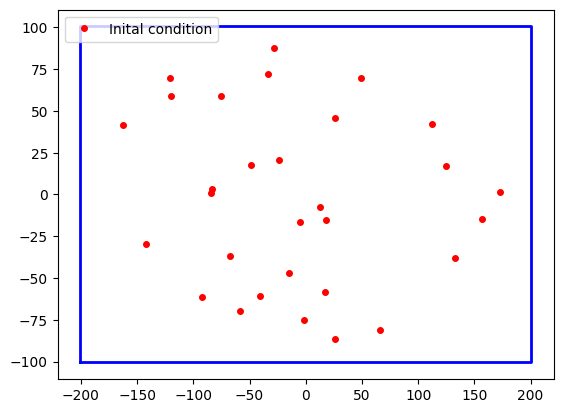

In [4]:
%matplotlib inline

Xf = s[0][-1,:]; Yf = s[1][-1,:]; Vxf = s[2][-1,:]; Vyf = s[3][-1,:]

b0 = box[0]/2 + R0/2; b1 = box[1]/2 + R0/2
plt.plot([-b0,b0,b0,-b0,-b0],[-b1,-b1,b1,b1,-b1],'-b',lw=2)
plt.plot(X0,Y0,'or',ms=4,label='Inital condition')
#plt.plot(X0,Y0,'or',ms=4,label='Final condition')
plt.legend(loc='upper left')
plt.show()

# **2. Animation**

In [5]:
date = 'module_test'
#date = datetime.now().strftime("%m-%d_%H-%M-%S")

In [6]:
#%matplotlib auto
#%matplotlib auto

#ani.animate_path(self1,s,duration=15,kind=0,save=False,name=date+'test.mp4',verbose=True,plot_params=['-b','or',1,5,0.3],amp=3)
#plt.show()

# **3. Analysis**

In [7]:
%matplotlib inline

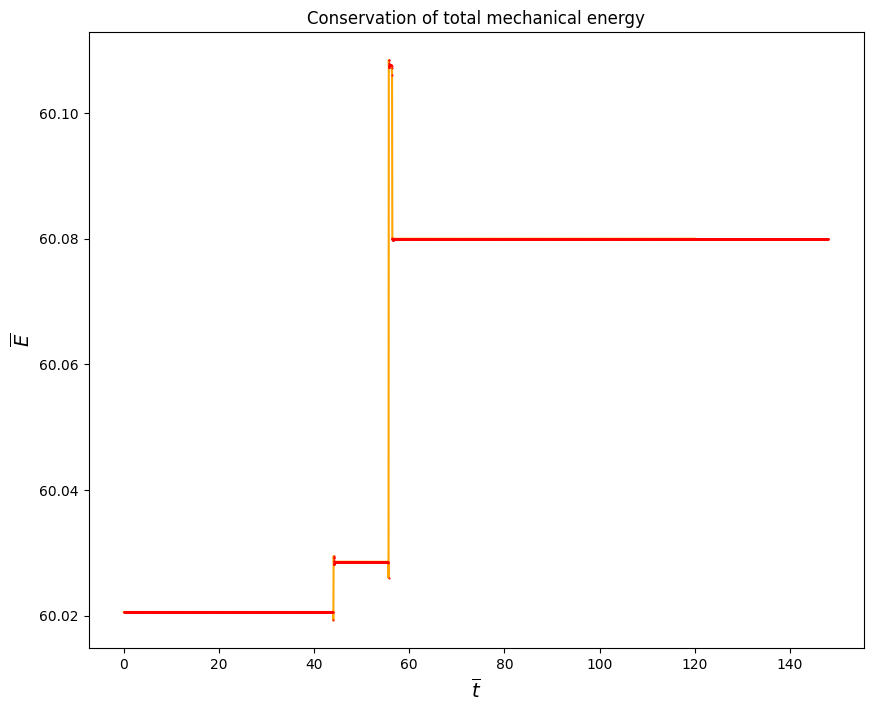

In [8]:
Em = sim.get_Energy(s)[2]

plt.figure(figsize=(10,8))
plt.title('Conservation of total mechanical energy')
plt.ylabel(r'$\overline{E}$',fontsize=14)
plt.xlabel(r'$\overline{t}$',fontsize=14)
plt.plot(time,Em,'-',color='orange') ;plt.plot(time,Em,'o',color='red', ms=0.5)
plt.savefig('images/NParticlesGas/'+date+' mechanical_energy.png',dpi=350)
plt.show()

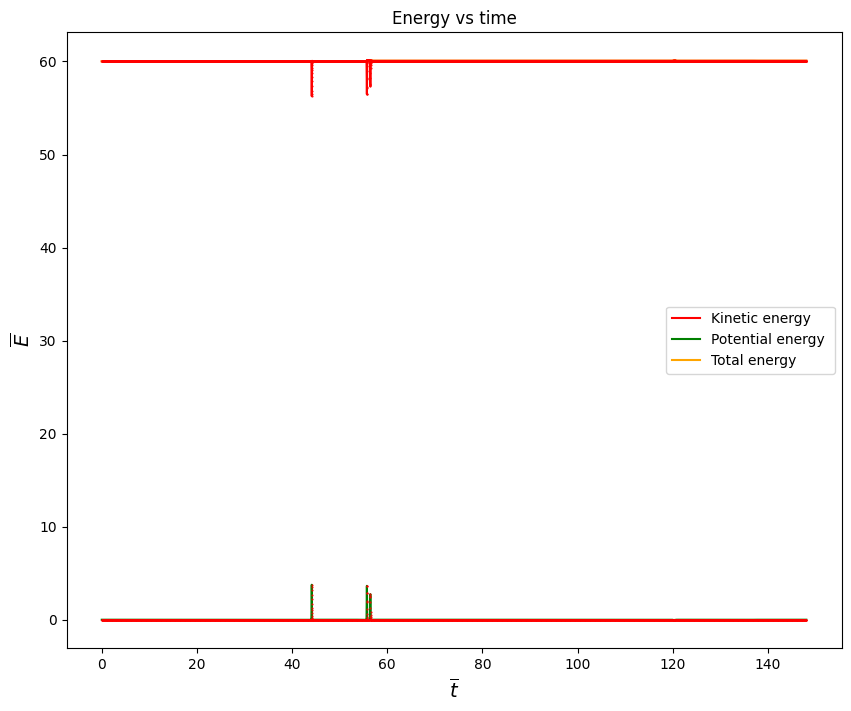

In [9]:
Ek, V, Em  = sim.get_Energy(s)

plt.figure(figsize=(10,8))
plt.title('Energy vs time')
plt.ylabel(r'$\overline{E}$',fontsize=14)
plt.xlabel(r'$\overline{t}$',fontsize=14)
plt.plot(time, Ek,'-',color='red',label = 'Kinetic energy') ;plt.plot(time, Ek,'o',color='red', ms=0.5)
plt.plot(time, V,'-',color='green',label = 'Potential energy ') ;plt.plot(time, V,'o',color='red', ms=0.5)
plt.plot(time, Em,'-',color='orange',label = 'Total energy') ;plt.plot(time, Em,'o',color='red', ms=0.5)
plt.legend()
plt.savefig('images/NParticlesGas/'+date+' energy.png',dpi=350)
plt.show()

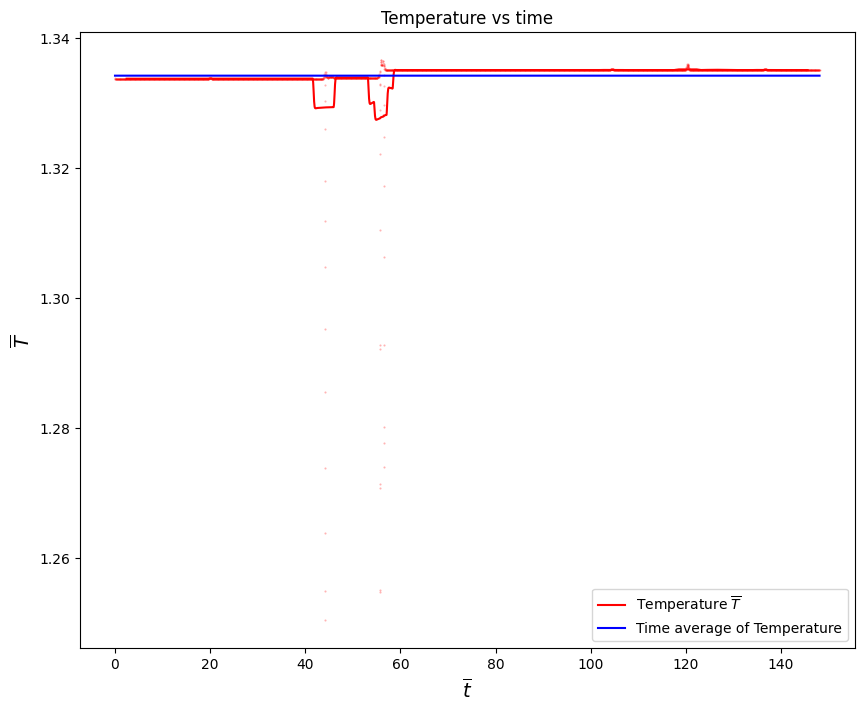

In [10]:
Ek, V, Em  = sim.get_Energy(s)
T = Ek*2/(3*self1.Np)
Tmean = np.mean(T)*np.ones(len(Ek))
#Em_mean = np.mean(Em*2/(3*self1.Np))*np.ones(len(Em))

time1, T1 = moving_mean(time,T,w=100)
plt.figure(figsize=(10,8))
plt.title('Temperature vs time')
plt.ylabel(r'$\overline{T}$',fontsize=14)
plt.xlabel(r'$\overline{t}$',fontsize=14)
plt.plot(time1, T1,'-',color='red',label = r'Temperature $\overline{T}$') ;plt.plot(time, T,'o',color='red',alpha=0.3, ms=0.5)
plt.plot(time, Tmean,'-',color='blue',label = r'Time average of Temperature')
#plt.plot(time, Em_mean,'-',color='cyan',label = r'Time average of $\frac{2}{3N_p}\overline{E}$')
plt.legend()
plt.savefig('images/NParticlesGas/'+date+' temperature.png',dpi=350)
plt.show()

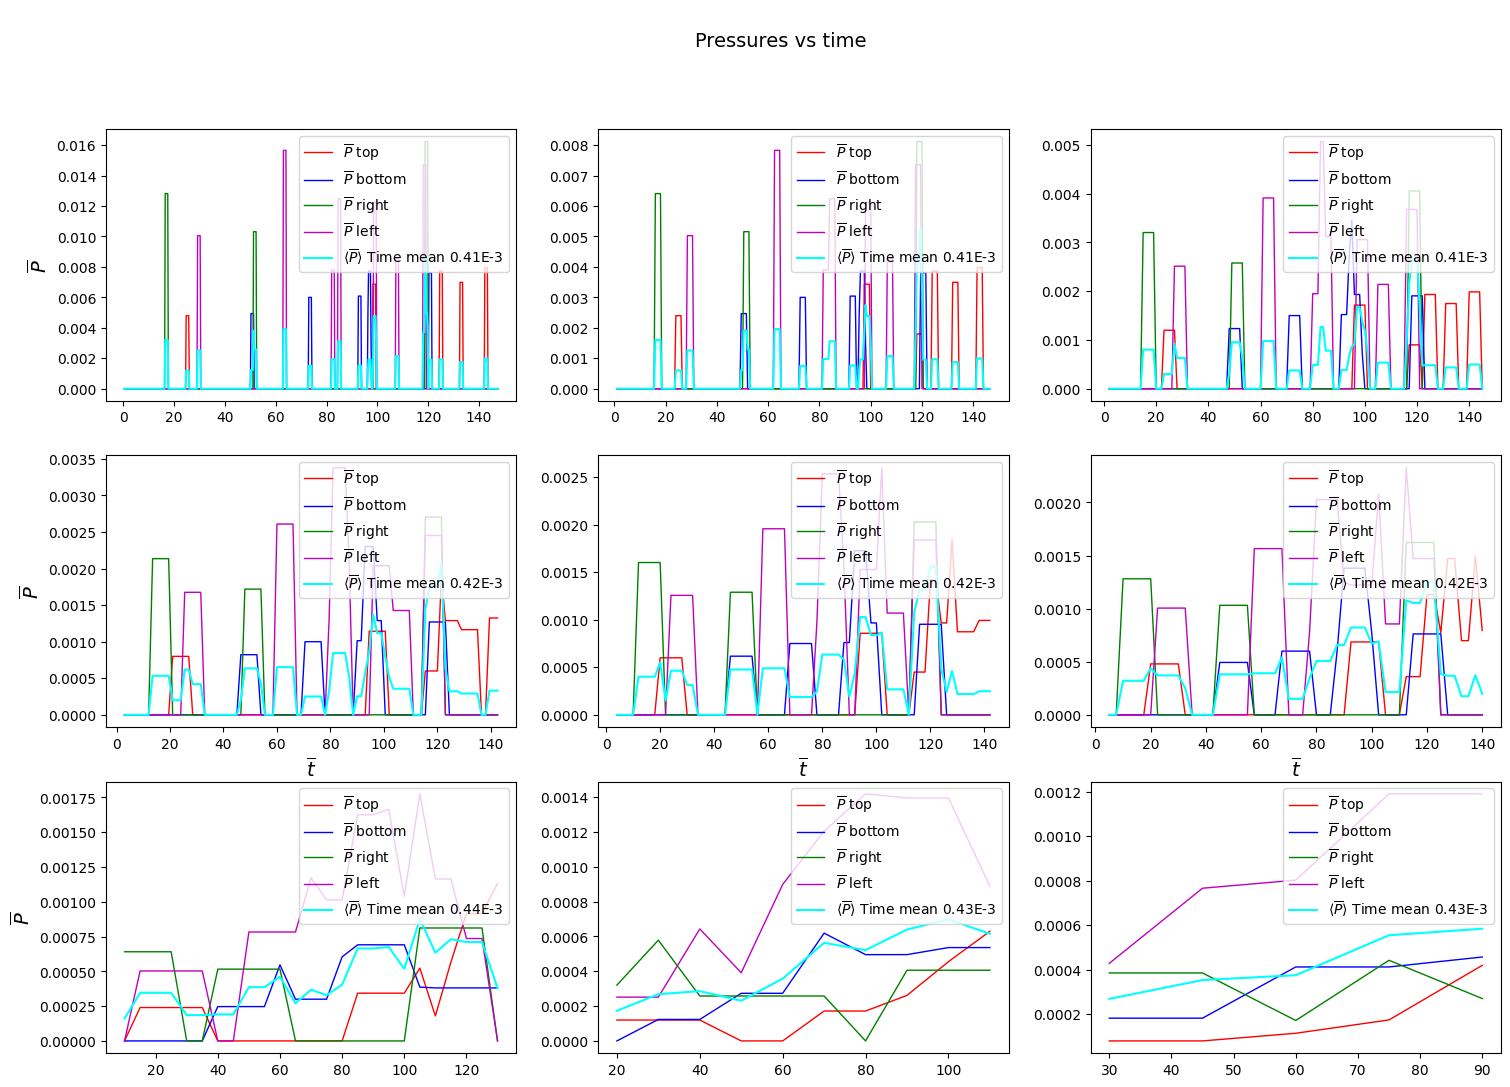

In [11]:
#Ldt = [5*h, 10*h, 20*h, 30*h, 40*h, 50*h, 60*h, 80*h, 100*h]
Ldt = [5*h, 10*h, 20*h, 30*h, 40*h, 50*h, 100*h, 200*h, 300*h]
press.plot_pressure_charts(s,time,box,Ldt,date=date,save=True)
plt.show()

In [12]:
Kmean = 3/2*np.mean(T)
P_predicted = 2/3*Np*Kmean/(box[0]*box[1])

print(f'P predicted: {np.round(np.mean(P_predicted)*10**3,3)}E-3')

P predicted: 0.5E-3


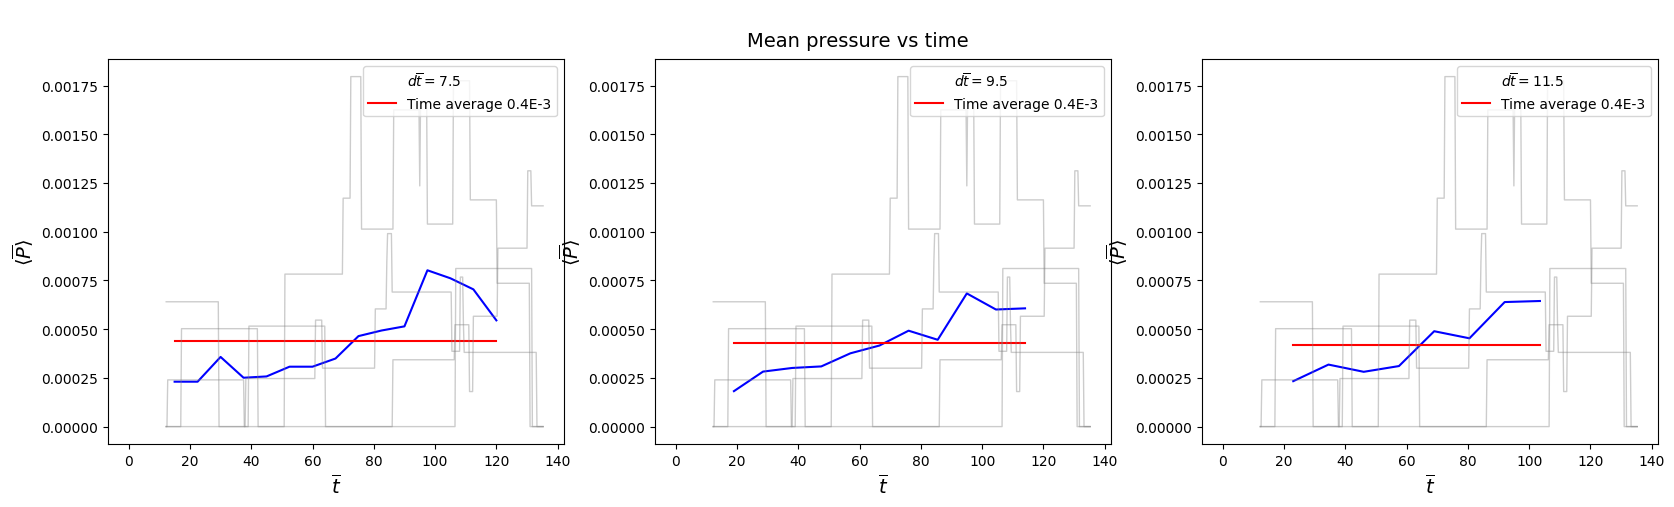

In [22]:
#Ldt = [60*h, 80*h, 100*h]
Ldt = [150*h, 190*h, 230*h]
press.plot_pressure_line(s,time,box,Ldt,h,w2=100,date=date,save=True)
plt.show()

In [23]:
print(f'Delta t: {2*box[0]/np.max(np.abs(Vx0))}')
print(f'Delta t: {2*box[0]/np.max(np.abs(Vx0))}')

Delta t: 397.11065467166935
Delta t: 397.11065467166935
